In [1]:
import numpy as np
import pandas as pd
import csv
import geopandas as gpd
import matplotlib.pyplot as plt

In [53]:
data_file = pd.read_csv('NYC_WiFi_Hotspot_Locations.csv')

In [54]:
data_file.head(5)

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10362,3,Limited Free,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,40.658385,-73.887583,1.015441e+06,179163.810029,...,East New York,42,11207,305,1104,1104,0,3043490001,217,"(40.658385, -73.8875829994)"
1,10447,4,Limited Free,SPECTRUM,Elmhurst Park,Park Area,40.728838,-73.883751,1.016470e+06,204833.279032,...,Elmhurst,25,11373,404,499,499,0,0,824,"(40.7288380002, -73.8837509996)"
2,10605,3,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,194851.884952,...,Brooklyn Heights-Cobble Hill,33,11201,302,1,1,0,3002050001,1409,"(40.7014999998, -73.9943000006)"
3,9753,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,...,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.6934417997, -73.9731930998)"
4,9884,3,Free,Downtown Brooklyn,NaN,409 Fulton St.,40.692178,-73.988304,9.874935e+05,191455.769697,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,11,11,3000281,3001440001,1028,"(40.6921780001, -73.9883039999)"


In [4]:
data_borough = data_file.groupby('Borough Name').size()
data_borough = pd.DataFrame(data_borough, columns=['number'])
data_borough = data_borough.reset_index()
data_borough

,Borough Name,number
0,Bronx,316
1,Brooklyn,700
2,Manhattan,1672
3,Queens,531
4,Staten Island,100


<BarContainer object of 5 artists>

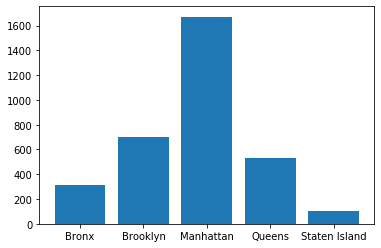

In [5]:
plt.bar(data_borough['Borough Name'], data_borough['number'])

In [6]:
data_file.columns

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Name', 'Location',
       'Latitude', 'Longitude', 'X', 'Y', 'Location_T', 'Remarks', 'City',
       'SSID', 'SourceID', 'Activated', 'BoroCode', 'Borough Name',
       'Neighborhood Tabulation Area Code (NTACODE)',
       'Neighborhood Tabulation Area (NTA)', 'Council Distrcit', 'Postcode',
       'BoroCD', 'Census Tract', 'BCTCB2010', 'BIN', 'BBL', 'DOITT_ID',
       'Location (Lat, Long)'],
      dtype='object')

In [8]:
test = data_file.groupby('Provider').size()
test = pd.DataFrame(test, columns=['number'])
test = test.reset_index()
#test = test[test['Census Tract']<=10000]
test

,Provider,number
0,ALTICEUSA,237
1,AT&T,27
2,BPL,59
3,Chelsea,30
4,City Tech,11
5,Downtown Brooklyn,100
6,Fiberless,30
7,Harlem,101
8,LinkNYC - Citybridge,1868
9,Manhattan Down Alliance,36


In [55]:
# change columns' names
data_file = data_file.rename(columns = {'Neighborhood Tabulation Area Code (NTACODE)':'ntacode', 'Neighborhood Tabulation Area (NTA)':'NTA'})

In [56]:
example = data_file[:1]
example.T

,0
OBJECTID,10362
Borough,3
Type,Limited Free
Provider,ALTICEUSA
Name,Linden Park
Location,IN PARK PLAYGROUND AREA
Latitude,40.6584
Longitude,-73.8876
X,1.01544e+06
Y,179164


In [58]:
# get the hotspots number in each NTA
data_nta = data_file.groupby('ntacode').size()
data_nta = pd.DataFrame(data_nta, columns=['wifi_number'])
data_nta

,wifi_number
ntacode,
BK09,27
BK17,18
BK19,1
BK21,32
BK25,1
BK26,1
BK27,8
BK29,2
BK30,7


In [63]:
# import NTA map
NTA_map = gpd.read_file('NTA_map/geo_export_568d3ac8-d15e-4211-93ec-14760957f21b.shp')

In [46]:
NTA_map.head(5)

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160586 40.62916656720947...
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816201 40.70072523469552...
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380268 40.86170058826308...
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.9760493559142 40.63127590564666,..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522774 40.65209593779453...


In [67]:
# merge NTA dataset and data_nta
NTA_wifi = NTA_map.join(data_nta, on='ntacode').fillna(0)
NTA_wifi.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,wifi_number
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160586 40.62916656720947...,1.0
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816201 40.70072523469552...,11.0
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380268 40.86170058826308...,9.0
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.9760493559142 40.63127590564666,...",8.0
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522774 40.65209593779453...,1.0


In [68]:
print(len(NTA_wifi))

195


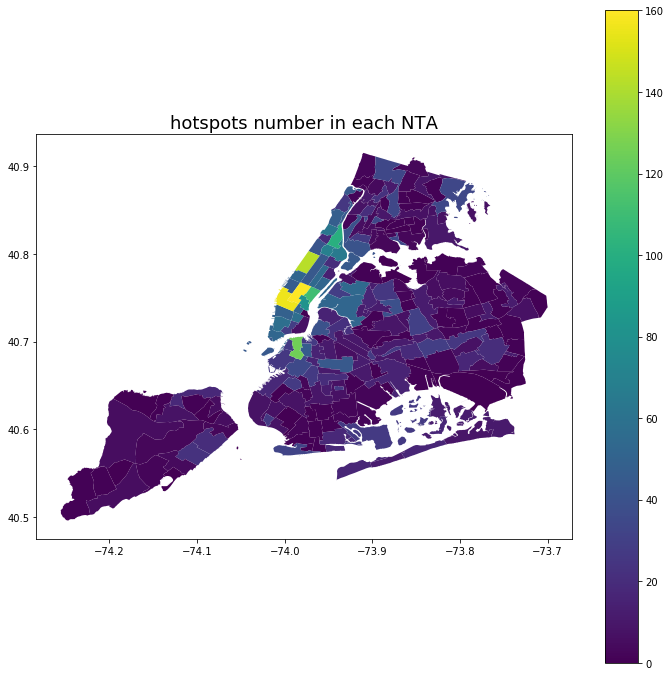

In [69]:
#visualization
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('hotspots number in each NTA', fontsize=18)
NTA_wifi.plot(axes=ax, column='wifi_number', legend=True)